In [54]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [3]:
_data = pd.read_csv('./data/my_table_0927.csv')

In [4]:
_data.dtypes

REG_SEQ          int64
GATEWAY_ID       int64
REPEATER_ID      int64
DEVICE_ID        int64
TYPE           float64
TEMP           float64
HUMIDITY       float64
SMOKE_DEN      float64
MIT            float64
DEN            float64
SMELL_DEN      float64
BATT_CAP       float64
STATUS         float64
REG_DTIME       object
SN             float64
BUTANE         float64
CURRENT        float64
FLAME          float64
DEVICE_TYPE    float64
dtype: object

In [5]:
#datetime으로 type 변경
_data.index = pd.to_datetime(_data['REG_DTIME'])

### 컨테이너 : 4월 4일부터 6월 5일 데이터 사용

In [6]:
_data_raw = _data.truncate(before='2021-04-04 00:00:00')
data_raw = _data_raw.truncate(after='2021-06-06 00:00:00')

In [8]:
is_device_4 = data_raw['DEVICE_ID'] == 4
is_device_5 = data_raw['DEVICE_ID'] == 5
data4 = data_raw[is_device_4]
data5 = data_raw[is_device_5]

### 필요한 변수만 선택

In [9]:
data4 = data4[['TEMP','HUMIDITY','SMOKE_DEN','REG_DTIME']]
data5 = data5[['TEMP','HUMIDITY','SMELL_DEN','DEN','REG_DTIME']]

### 중복값 확인

In [10]:
# device 4
dup_idx_4 = np.ravel(np.where(data4.duplicated(['REG_DTIME']) == True))
# device 5
dup_idx_5 = np.ravel(np.where(data5.duplicated(['REG_DTIME']) == True))

### 중복은 평균값으로 대체

In [11]:
after_data4 = data4.copy()
for i in dup_idx_4:
    dup_date = data4['REG_DTIME'].iloc[i]
    dup_array = np.ravel(np.where(data4['REG_DTIME'] == dup_date))
    for n,j in enumerate(dup_array):
        if n== 0:
            init_idx = j
            left = data4.iloc[j][:3].copy()
        else : 
            left += data4.iloc[j][:3].copy()
    after_data4.iloc[init_idx,:3] = left/len(dup_array)

In [12]:
after_data5 = data5.copy()
for i in dup_idx_5:
    dup_date = data5['REG_DTIME'].iloc[i]
    dup_array = np.ravel(np.where(data5['REG_DTIME'] == dup_date))
    for n,j in enumerate(dup_array):
        if n== 0:
            init_idx = j
            left = data5.iloc[j][:4].copy()
        else : 
            left += data5.iloc[j][:4].copy()
    after_data5.iloc[init_idx,:4] = left/len(dup_array)

In [13]:
after_data4.drop_duplicates(['REG_DTIME'], keep='first',inplace = True)
after_data5.drop_duplicates(['REG_DTIME'], keep='first',inplace = True)

In [14]:
print(np.ravel(np.where(after_data4.duplicated(['REG_DTIME']) == True)))
print(np.ravel(np.where(after_data5.duplicated(['REG_DTIME']) == True)))

[]
[]


In [15]:
after_data4 = after_data4.fillna(0)
after_data5 = after_data5.fillna(0)

### Test :  4월 11일~ 4월 30일(화재 : 12, 17, 24일), Train : 5월 1일 ~ 6월 5일, Valid : 4월 4일 ~ 4월 10일

In [41]:
trunc_data4 = after_data4.truncate(after ='2021-04-30 23:59:59')

In [42]:
trunc_data5 = after_data5.truncate(after ='2021-04-30 23:59:59')

In [43]:
test_data5 = trunc_data5.truncate(before ='2021-04-11 00:00:00')

In [44]:
test_data4 = trunc_data4.truncate(before ='2021-04-11 00:00:00')

In [45]:
valid_data5 = trunc_data5.truncate(after ='2021-04-11 00:00:00')

In [46]:
valid_data4 = trunc_data4.truncate(after ='2021-04-11 00:00:00')

In [50]:
train_data5 = after_data5.truncate(before ='2021-04-30 23:59:59')

In [51]:
train_data4 = after_data4.truncate(before ='2021-04-30 23:59:59')

### minmax scaling

### 저장

In [52]:
train_data4.to_csv('./final_data_0927/device4_train.csv')
valid_data4.to_csv('./final_data_0927/device4_valid.csv')
test_data4.to_csv('./final_data_0927/device4_test.csv')
train_data5.to_csv('./final_data_0927/device5_train.csv')
valid_data5.to_csv('./final_data_0927/device5_valid.csv')
test_data5.to_csv('./final_data_0927/device5_test.csv')

In [56]:
train_data4['count'] = 1

In [59]:
train_data4['count'].resample('D')

In [69]:
train_data4.resample('1T').first()[10:20]

,TEMP,HUMIDITY,SMOKE_DEN,REG_DTIME,count
REG_DTIME,,,,,
2021-05-01 00:10:00,12.0,52.0,2037.0,2021-05-01 00:10:29,1.0
2021-05-01 00:11:00,12.0,52.0,2035.0,2021-05-01 00:11:09,1.0
2021-05-01 00:12:00,12.0,52.0,2036.0,2021-05-01 00:12:59,1.0
2021-05-01 00:13:00,12.0,52.0,2036.0,2021-05-01 00:13:29,1.0
2021-05-01 00:14:00,NaN,NaN,NaN,None,NaN
2021-05-01 00:15:00,12.0,52.0,2035.0,2021-05-01 00:15:39,1.0
2021-05-01 00:16:00,12.0,52.0,2036.0,2021-05-01 00:16:00,1.0
2021-05-01 00:17:00,NaN,NaN,NaN,None,NaN
2021-05-01 00:18:00,12.0,52.0,2038.0,2021-05-01 00:18:19,1.0


In [68]:
train_data5[10:20]

,TEMP,HUMIDITY,SMELL_DEN,DEN,REG_DTIME
REG_DTIME,,,,,
2021-05-01 00:01:46,17.0,35.0,523.0,159.0,2021-05-01 00:01:46
2021-05-01 00:02:07,17.0,35.0,516.0,159.0,2021-05-01 00:02:07
2021-05-01 00:02:16,17.0,35.0,509.0,159.0,2021-05-01 00:02:16
2021-05-01 00:02:26,17.0,36.0,509.0,159.0,2021-05-01 00:02:26
2021-05-01 00:02:36,17.0,36.0,509.0,158.0,2021-05-01 00:02:36
2021-05-01 00:02:46,17.0,36.0,516.0,159.0,2021-05-01 00:02:46
2021-05-01 00:02:56,17.0,36.0,509.0,158.0,2021-05-01 00:02:56
2021-05-01 00:03:06,17.0,36.0,509.0,159.0,2021-05-01 00:03:06
2021-05-01 00:03:16,17.0,36.0,509.0,158.0,2021-05-01 00:03:16


In [72]:
test_data4

,TEMP,HUMIDITY,SMOKE_DEN,REG_DTIME
REG_DTIME,,,,
2021-04-11 00:00:34,10.0,63.0,2036.0,2021-04-11 00:00:34
2021-04-11 00:02:35,10.0,63.0,2034.0,2021-04-11 00:02:35
2021-04-11 00:02:44,10.0,63.0,2037.0,2021-04-11 00:02:44
2021-04-11 00:03:04,10.0,63.0,2036.0,2021-04-11 00:03:04
2021-04-11 00:03:14,10.0,64.0,2036.0,2021-04-11 00:03:14
...,...,...,...,...
2021-04-30 23:58:29,12.0,51.0,2033.0,2021-04-30 23:58:29
2021-04-30 23:58:49,12.0,52.0,2033.0,2021-04-30 23:58:49
2021-04-30 23:58:59,12.0,51.0,2037.0,2021-04-30 23:58:59


In [74]:
from matplotlib import pyplot as plt
from matplotlib import dates

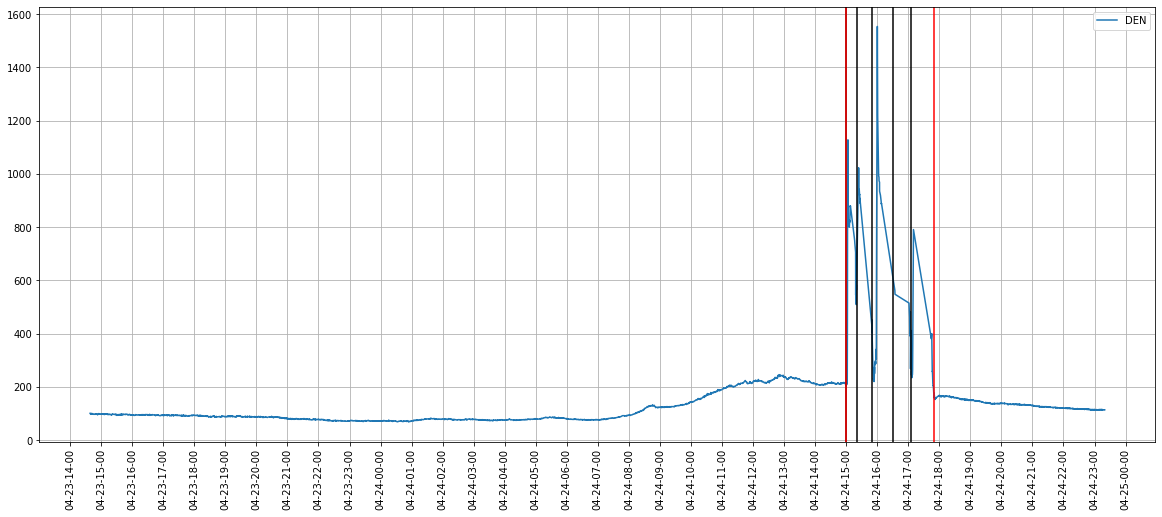

In [135]:
plt.figure(figsize = (20,8))
plt.plot_date(test_data5.index.values[35000:40000], test_data5[['DEN']][35000:40000], fmt = '-')
plt.gca().xaxis.set_major_locator(dates.HourLocator())
plt.gca().xaxis.set_major_formatter(dates.DateFormatter('%m-%d-%H-%M'))
plt.setp(plt.gca().xaxis.get_majorticklabels(),'rotation', 90)
plt.axvline(pd.Timestamp('2021-04-24 15:00:00'),color='black')
plt.axvline(pd.Timestamp('2021-04-24 15:20:00'),color='black')
plt.axvline(pd.Timestamp('2021-04-24 15:50:00'),color='black')
plt.axvline(pd.Timestamp('2021-04-24 16:30:00'),color='black')
plt.axvline(pd.Timestamp('2021-04-24 17:05:00'),color='black')
plt.axvline(pd.Timestamp('2021-04-24 15:00:00'),color='red')
plt.axvline(pd.Timestamp('2021-04-24 17:50:00'),color='red')
plt.grid()
plt.legend(['DEN'])#,'HUMIDITY','SMOKE_DEN'])
plt.show()

In [175]:
test_data4 = pd.read_csv('./final_data_0927/container/device4_test.csv',index_col = 0)

In [164]:
test_data4.index = pd.to_datetime(test_data4.index)

In [167]:
test_data4

,TEMP,HUMIDITY,SMOKE_DEN,REG_DTIME.1
REG_DTIME,,,,
2021-04-11 00:00:34,10.0,63.0,2036.0,2021-04-11 00:00:34
2021-04-11 00:02:35,10.0,63.0,2034.0,2021-04-11 00:02:35
2021-04-11 00:02:44,10.0,63.0,2037.0,2021-04-11 00:02:44
2021-04-11 00:03:04,10.0,63.0,2036.0,2021-04-11 00:03:04
2021-04-11 00:03:14,10.0,64.0,2036.0,2021-04-11 00:03:14
...,...,...,...,...
2021-04-30 23:58:29,12.0,51.0,2033.0,2021-04-30 23:58:29
2021-04-30 23:58:49,12.0,52.0,2033.0,2021-04-30 23:58:49
2021-04-30 23:58:59,12.0,51.0,2037.0,2021-04-30 23:58:59


In [172]:
# test_data4['label'] = 0
sub = test_data4[test_data4.index >= pd.Timestamp('2021-04-24 15:00:00')]
sub = sub[sub.index <= pd.Timestamp('2021-04-24 17:50:00')]
test_data4['label'][sub.index] = 1
test_data4

<ipython-input-172-46be7703977e>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data4['label'][sub.index] = 1
/home/sigkdd2021/miniconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


,TEMP,HUMIDITY,SMOKE_DEN,REG_DTIME.1,label
REG_DTIME,,,,,
2021-04-11 00:00:34,10.0,63.0,2036.0,2021-04-11 00:00:34,0
2021-04-11 00:02:35,10.0,63.0,2034.0,2021-04-11 00:02:35,0
2021-04-11 00:02:44,10.0,63.0,2037.0,2021-04-11 00:02:44,0
2021-04-11 00:03:04,10.0,63.0,2036.0,2021-04-11 00:03:04,0
2021-04-11 00:03:14,10.0,64.0,2036.0,2021-04-11 00:03:14,0
...,...,...,...,...,...
2021-04-30 23:58:29,12.0,51.0,2033.0,2021-04-30 23:58:29,0
2021-04-30 23:58:49,12.0,52.0,2033.0,2021-04-30 23:58:49,0
2021-04-30 23:58:59,12.0,51.0,2037.0,2021-04-30 23:58:59,0


In [173]:
test_data4['label'][sub.index]

REG_DTIME
2021-04-24 15:00:11    1
2021-04-24 15:00:21    1
2021-04-24 15:02:01    1
2021-04-24 15:02:11    1
2021-04-24 15:02:21    1
                      ..
2021-04-24 17:49:11    1
2021-04-24 17:49:21    1
2021-04-24 17:49:31    1
2021-04-24 17:49:41    1
2021-04-24 17:49:51    1
Name: label, Length: 571, dtype: int64

In [174]:
test_data4.to_csv('./final_data_0927/container/device4_anomaly_test.csv')

In [182]:
anomaly_4 = pd.read_csv('./final_data_0927/container/device4_anomaly_test.csv', index_col = 0)

In [183]:
test_data4.index

Index(['2021-04-11 00:00:34', '2021-04-11 00:02:35', '2021-04-11 00:02:44',
       '2021-04-11 00:03:04', '2021-04-11 00:03:14', '2021-04-11 00:03:34',
       '2021-04-11 00:03:44', '2021-04-11 00:04:04', '2021-04-11 00:05:04',
       '2021-04-11 00:05:14',
       ...
       '2021-04-30 23:56:59', '2021-04-30 23:57:19', '2021-04-30 23:57:39',
       '2021-04-30 23:57:59', '2021-04-30 23:58:09', '2021-04-30 23:58:29',
       '2021-04-30 23:58:49', '2021-04-30 23:58:59', '2021-04-30 23:59:09',
       '2021-04-30 23:59:19'],
      dtype='object', name='REG_DTIME', length=72416)